In [1]:
import numpy as np
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot

from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

## 1) Implement the K-means algorithm 

In [32]:
def dist(a, b):
    return np.linalg.norm(a - b)

def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = np.sqrt(squared_distance)
    return dist

def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
    return c_position

def error(c, c_old):
    return dist(c, c_old)

def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            #print('for n', clusters[j], 'for j', j)
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            # checking for empty np-array
            if points != []:
                c_positions[j] = np.mean(points, axis=0)
            else:
                continue
        
        error = dist(c_positions, old_clusters) # check for convergence
        
    return c_positions, clusters

def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='r')
    pyplot.show()

In [4]:
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    %matplotlib inline
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.show()

In [5]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
print(f_cent)

4


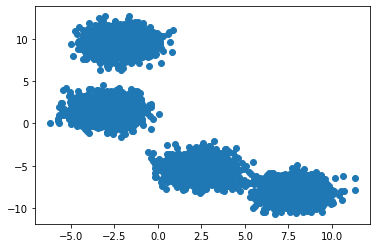

In [6]:
plot_reg_data(x)

In [7]:
cc_pos = gen_rand_cluster(f_cent)
cc_pos

array([[ 4, -4],
       [ 2,  2],
       [ 2,  0],
       [ 0, -3]])

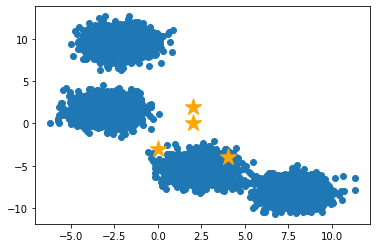

In [8]:
get_centroids(x, cc_pos)

In [9]:
nc, p = kmeans(x, cc_pos, f_cent)

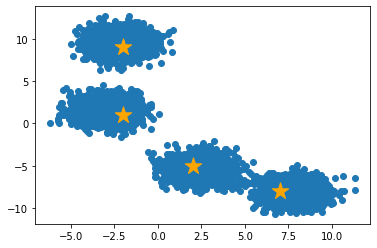

In [10]:
get_centroids(x, nc)

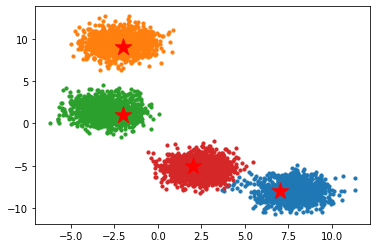

In [11]:
plot_in_col(x, f_cent, p, nc)

Do you get the same result every time?
- The result will often be similar for us but no the same. K-means is an algorithm that is in a way moving centroids iteratively so that they become better and better at splitting data and while this process is deterministic, you have to pick initial values for those centroids and this is usually done at random.

How do you determine what the final result should be?

How do you choose what K value to use?




In [12]:
# Testing the distance methon
test_sse = dist_2d(nc, p)
print(len(test_sse))
print(test_sse[0], test_sse[1])

2
8.306623862918075 12.922847983320086


In [33]:
'''
Generating new clusters and calculating distance 
'''
nc_lst = [] # centroid pos
p_lst = [] # cluster pos
centroids_lst = [] # number of centroids per cluster
k=5
for i in range(1,k):
    f_cent, x, xx, yy = generate_fake_data(i)
    cc_pos = gen_rand_cluster(k)
    nc, p = kmeans(x, cc_pos, k)
    # appending positions to list
    nc_lst.append(nc)
    p_lst.append(p)
    centroids_lst.append(x)
    
sum_lst = []
for i in range(len(nc_lst)):
    # distance betwwn centroid and repective cluster
    test_sse_1 = dist_2d(nc_lst[i], p_lst[i]) 
    # appending each distance to list
    sum_lst.append(test_sse_1)

In [34]:
print(sum_lst)

[array([11.40175425, 17.34935157]), array([ 9.64365076, 12.04159458]), array([ 6.78232998, 16.73320053]), array([ 7.        , 18.52025918])]


In [35]:
cc_sort = np.sort(nc_lst)
cent_sort = np.sort(centroids_lst)

In [36]:
'''
getting lowes value
'''
#for c in range(len(sum_lst)):
sum_sort = np.sort(np.array(sum_lst), axis=1)
sum_sort

array([[11.40175425, 17.34935157],
       [ 9.64365076, 12.04159458],
       [ 6.78232998, 16.73320053],
       [ 7.        , 18.52025918]])

In [37]:
# make one-dimn array and sort (decending)
x_test = np.concatenate(sum_sort)
x_test = np.sort(x_test)[::-1]
print(x_test)

[18.52025918 17.34935157 16.73320053 12.04159458 11.40175425  9.64365076
  7.          6.78232998]


Text(0, 0.5, 'SUM OF SQUARE ERROR')

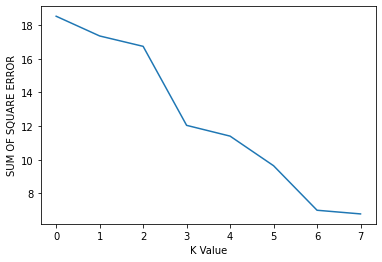

In [38]:
pyplot.plot(x_test)
pyplot.xlabel('K Value')
pyplot.ylabel('SUM OF SQUARE ERROR')

**Compare with the built in elbow method**

Text(0.5, 1.0, 'Elbow curve')

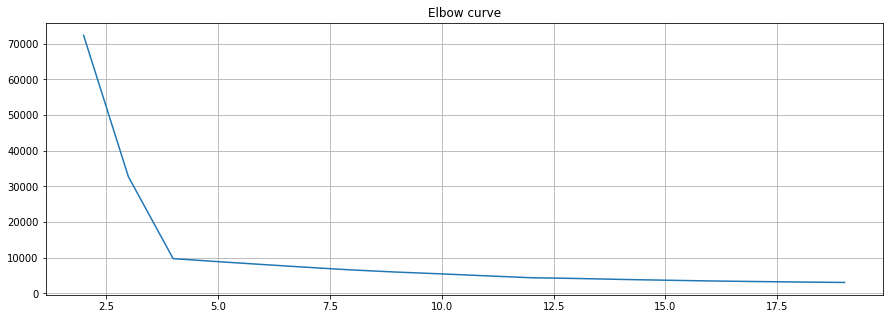

In [39]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = x # <your_data>
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

As we can see in the two last graphs, they are showing the same.

## 2) Apply the K-means algorithm to compress an image

In [40]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

In [52]:
from __future__ import print_function
from skimage import io
#from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

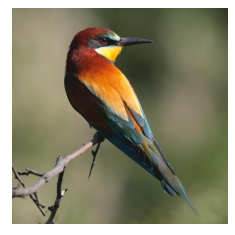

In [42]:
img  = io.imread('img_test.png')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [43]:
img.shape

(520, 520, 3)

In [44]:
img_data = (img / 255.).reshape(-1, 3)
img_data.shape

(270400, 3)

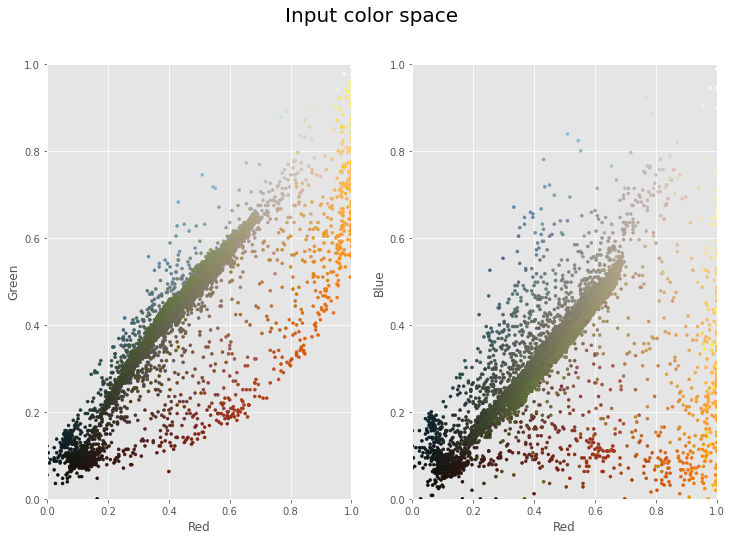

In [45]:
from plot_utils import plot_utils
x_color = plot_utils(img_data, title='Input color space')
x_color.colorSpace()

In [46]:
'''
img.data into kmeans
'''
print(x_color)
print(img_data)
print(img_data.shape)

[[0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 ...
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]]
(270400, 3)


In [49]:
'''
SKA INTE FUNGERA
'''
img_nc, img_p = kmeans(imgdata)

NameError: name 'imgdata' is not defined

In [50]:
img_arr = np.array(img_data)
print(img_arr)
#get_centroids(img_arr, 5, 4)

[[0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 ...
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]]


In [51]:
k_img = np.reshape(img_arr, (img_data.shape))
print(k_img)

[[0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 [0.5254902  0.50588235 0.39215686]
 ...
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]
 [0.4        0.42745098 0.25490196]]


In [125]:
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
    
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))   
    return np.argmin(distances, axis=0)
    
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    
def fit(points):
    pre_centroids = None
    centroids = None
    pre_centroids = initialize_centroids(points, k)
    
    max_iter = 50 # TEST
    for i in range(max_iter):
        closest = predict(points, pre_centroids)
        pre_centroids = move_centroids(points, closest, pre_centroids)
    return closest 
    
def predict(points, pre_centroids):
    closest = closest_centroid(points, pre_centroids)
    return closest 

In [140]:
# finding the closest centroids
def find_centroides(X, cent):
    idxs = np.zeros((X.shape[0],1))

    for x in range(idxs.shape[0]):
        point = X[x]
        min_dist, id_x = 9999999, 0
        for i in range(cent.shape[0]):
            cent = cent[i]
            dist = distance(cent,point)
            if dist < min_dist:
                min_dist = dist
                id_x = i
        idxs[x] = id_x
        
    return idxs

# get the squared distande
def distance(p1, p2):
    assert p1.shape == p2.shape
    return np.sum(np.square(p2-p1))

# compute cenbtroid mean
def c_centroids(X, idxs):
    sub_X = []
    for x in range(len(np.unique(idxs))):
        sub_X.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    ret = np.array([np.mean(tX,axis=0) for tX in sub_X])
    return ret

# run kmeans
def k_means(X, centroids, K):
    n_iter = 50
    cent_h = []
    curr_cent = centroids
    for myiter in range(n_iter):
        cent_h.append(curr_cent)
        idxs = find_centroides(X,centroids)
        curr_cent = c_centroids(X,idxs)
        
    return idxs, centroid_history

k_colors = find_centroides(img_data, cc_pos)

AssertionError: 

In [132]:
# något RÖR EJ!
#pre_centroids = None
img_arr = np.array(img_data)
closest = fit(img_data)
k_colors = get_centroids(img_arr.shape, closest)
k_colors = centroids[closest]
print('Done...')

TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
k_colors = cluster_centers_[kmeans.predict(img_data)]

In [84]:
k = 4
ll = fit_poits(img_data, k)

TypeError: 'NoneType' object is not subscriptable

In [120]:
#k = 4
#cc_pos_img = gen_rand_cluster(k) # tror denna är fel

#nc_img, p_img = kmeans(k_img, cc_pos_img, k)
# appending positions to list


In [ ]:
print(nc_img)

In [ ]:
print(p_img)

In [128]:
closest = kmeans.fit(sum_sort)

ValueError: n_samples=4 should be >= n_clusters=16.

## TEST

In [54]:
from KMeans import KMean

In [55]:
kmeans = KMean(k=16, max_iter=300)
closest = kmeans.fit(img_data)
k_colors = kmeans.centroids[closest]

In [57]:
from sklearn.cluster import KMeans

In [58]:
kmeans =  KMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

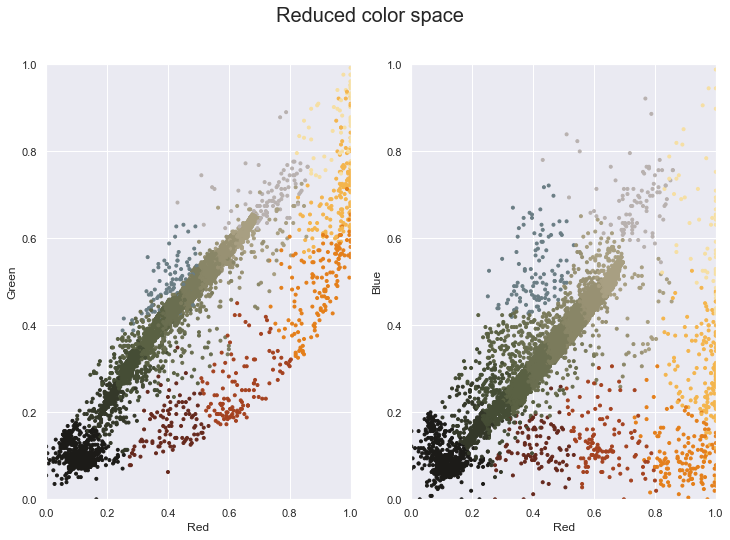

In [61]:
y = plot_utils(img_data, colors=k_colors, title="Reduced color space")
y.colorSpace()

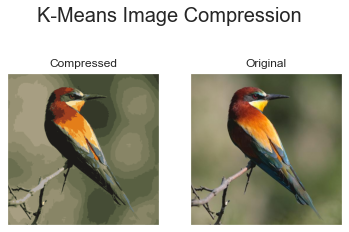

In [60]:
k_img = np.reshape(k_colors,(img.shape))
    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('K-Means Image Compression', fontsize=20)


ax1.set_title('Compressed')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(k_img)

ax2.set_title('Original')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(img)
#adjust the heading
plt.subplots_adjust(top=.85)
plt.show()

--------------------------

Download:
```
python -m pip install -U scikit-image[optional]
```
- https://analyticsindiamag.com/beginners-guide-to-image-compression-using-k-means-clustering/



In [31]:
import matplotlib

matplotlib.__version__

'3.3.2'